## Introduction

#### The Air Quality Index (AQI) dataset provides a detailed view of air pollution levels across various cities over time. It captures the concentration of major air pollutants and combines them into a single metric—the AQI—which reflects the overall air quality. Monitoring these pollutants is essential for understanding environmental health, guiding public policy, and informing individuals about potential health risks.

## Problem Statement

#### Air pollution poses a significant threat to public health, especially in urban areas where industrial activities and vehicle emissions are high. Understanding the patterns and contributors to poor air quality can help in developing effective environmental policies and public health advisories. This project aims to analyze and model air quality data collected from multiple cities over time. The primary goal is to identify key factors contributing to poor air quality and develop predictive models to forecast the Air Quality Index (AQI) based on pollutant levels. This will enable stakeholders to take proactive measures to reduce pollution and protect public health.

## Project Outcome

#### 1. Comprehensive Data Understanding
#### 2. Pollutant Impact Assessment
#### 3. Predictive Modeling
#### 4. City-Level Air Quality Insights
#### 5. Seasonal Trend Analysis
#### 6. Data Preprocessing
#### 7. Linear Regression
#### 8. Logistic Regression
#### 9. Decision Trees
#### 10. Random Forest

## Importing libraries required for this data set

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport

from sklearn.preprocessing import LabelEncoder

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

from sklearn.metrics import classification_report

from sklearn.tree import DecisionTreeClassifier, plot_tree

from sklearn.ensemble import RandomForestClassifier

## Loading the dataset

In [2]:
df = pd.read_csv('Air_Quality.csv')

In [3]:
df.columns

Index(['id', 'country', 'state', 'city', 'station', 'pollutant_id',
       'last_update', 'pollutant_min', 'pollutant_max', 'pollutant_avg'],
      dtype='object')

## Getting information about the dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1836 entries, 0 to 1835
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1836 non-null   int64  
 1   country        1836 non-null   object 
 2   state          1836 non-null   object 
 3   city           1836 non-null   object 
 4   station        1836 non-null   object 
 5   pollutant_id   1836 non-null   object 
 6   last_update    1836 non-null   object 
 7   pollutant_min  1738 non-null   float64
 8   pollutant_max  1738 non-null   float64
 9   pollutant_avg  1738 non-null   float64
dtypes: float64(3), int64(1), object(6)
memory usage: 143.6+ KB


## Looking at the number of rows and columns in the dataset

In [5]:
df.shape

(1836, 10)

## Having glance at the first five rows of dataset

In [6]:
df.head()

id country           state       city                         station  \
0   1   India  Andhra_Pradesh  Amaravati  Secretariat, Amaravati - APPCB   
1   2   India  Andhra_Pradesh  Amaravati  Secretariat, Amaravati - APPCB   
2   3   India  Andhra_Pradesh  Amaravati  Secretariat, Amaravati - APPCB   
3   4   India  Andhra_Pradesh  Amaravati  Secretariat, Amaravati - APPCB   
4   5   India  Andhra_Pradesh  Amaravati  Secretariat, Amaravati - APPCB   

  pollutant_id          last_update  pollutant_min  pollutant_max  \
0        PM2.5  21-10-2021 01:00:00           69.0          109.0   
1         PM10  21-10-2021 01:00:00           82.0          138.0   
2          NO2  21-10-2021 01:00:00           10.0           42.0   
3          NH3  21-10-2021 01:00:00            4.0            5.0   
4          SO2  21-10-2021 01:00:00           16.0           42.0   

   pollutant_avg  
0           86.0  
1          105.0  
2           19.0  
3            4.0  
4           27.0

## Having glance at the last five rows of dataset

In [7]:
df.tail()

id country        state     city                    station  \
1831  1832   India  West_Bengal  Kolkata  Victoria, Kolkata - WBPCB   
1832  1833   India  West_Bengal  Kolkata  Victoria, Kolkata - WBPCB   
1833  1834   India  West_Bengal  Kolkata  Victoria, Kolkata - WBPCB   
1834  1835   India  West_Bengal  Kolkata  Victoria, Kolkata - WBPCB   
1835  1836   India  West_Bengal  Kolkata  Victoria, Kolkata - WBPCB   

     pollutant_id          last_update  pollutant_min  pollutant_max  \
1831          NO2  21-10-2021 01:00:00           10.0           22.0   
1832          NH3  21-10-2021 01:00:00            1.0            3.0   
1833          SO2  21-10-2021 01:00:00            6.0           28.0   
1834           CO  21-10-2021 01:00:00           34.0           92.0   
1835        OZONE  21-10-2021 01:00:00           10.0          116.0   

      pollutant_avg  
1831           15.0  
1832            2.0  
1833           10.0  
1834           41.0  
1835           43.0

## To find is there any null value in the dataset

In [8]:
df.isnull().sum()

id                0
country           0
state             0
city              0
station           0
pollutant_id      0
last_update       0
pollutant_min    98
pollutant_max    98
pollutant_avg    98
dtype: int64

## Fill The Null Value With Mean

In [9]:
df['pollutant_avg'] = df['pollutant_avg'].fillna(df['pollutant_avg'].mean())
df['pollutant_min'] = df['pollutant_min'].fillna(df['pollutant_min'].mean())
df['pollutant_max'] = df['pollutant_max'].fillna(df['pollutant_max'].mean())

## To Check If There Is Any Null Value 

In [10]:
df.isnull().sum()

id               0
country          0
state            0
city             0
station          0
pollutant_id     0
last_update      0
pollutant_min    0
pollutant_max    0
pollutant_avg    0
dtype: int64

## To find is there any duplicate value in dataset

In [11]:
df.duplicated().sum()

0

## To find the correlation in the data set

In [12]:
df.corr(numeric_only=True)

id  pollutant_min  pollutant_max  pollutant_avg
id             1.000000      -0.037360      -0.033475      -0.022574
pollutant_min -0.037360       1.000000       0.788666       0.892249
pollutant_max -0.033475       0.788666       1.000000       0.935664
pollutant_avg -0.022574       0.892249       0.935664       1.000000

## Data Visualization

### Bar Plot Showing Pollutant Distribution Across State

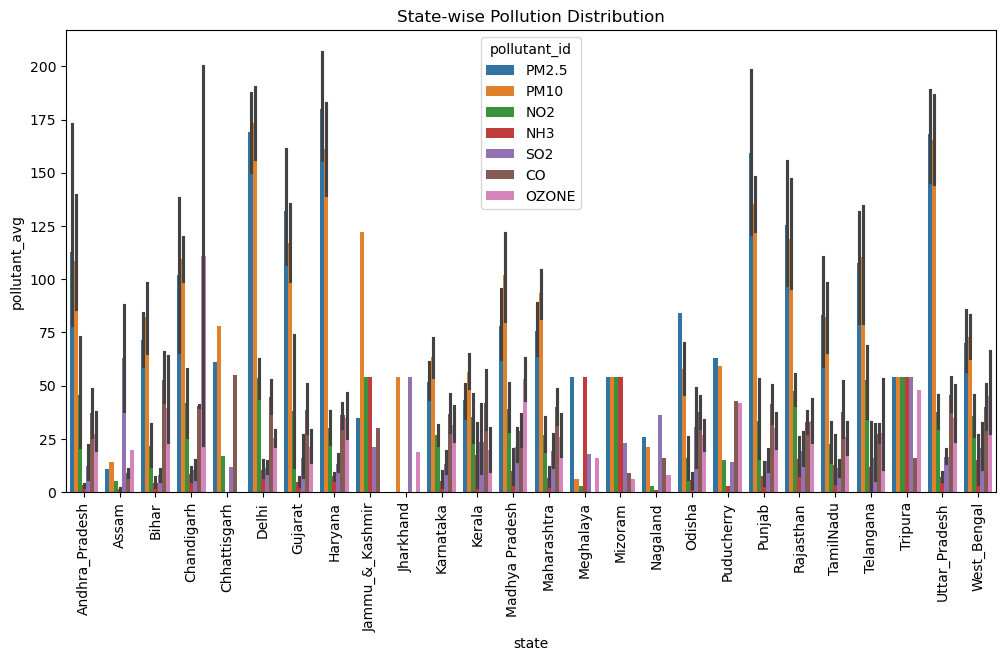

In [13]:
plt.figure(figsize=(12,6))
sns.barplot(data=df, x='state', y='pollutant_avg', hue='pollutant_id')
plt.title('State-wise Pollution Distribution')
plt.xticks(rotation=90)
plt.show()

## Pollutant Variability by Station

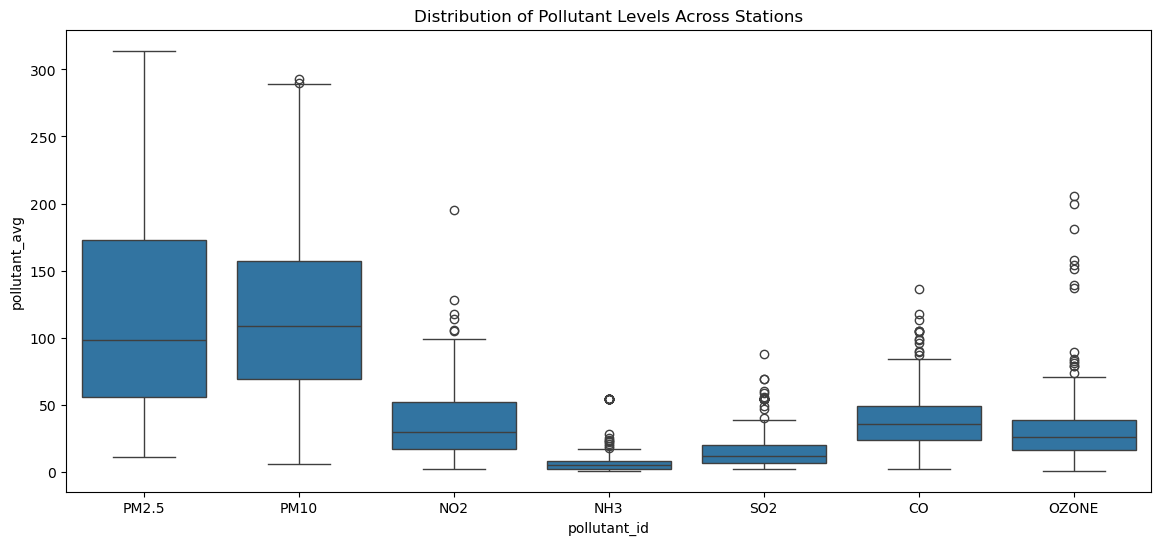

In [14]:
plt.figure(figsize=(14,6))
sns.boxplot(data=df, x='pollutant_id', y='pollutant_avg')
plt.title('Distribution of Pollutant Levels Across Stations')
plt.show()

## Pollutant Max vs Min Comparison

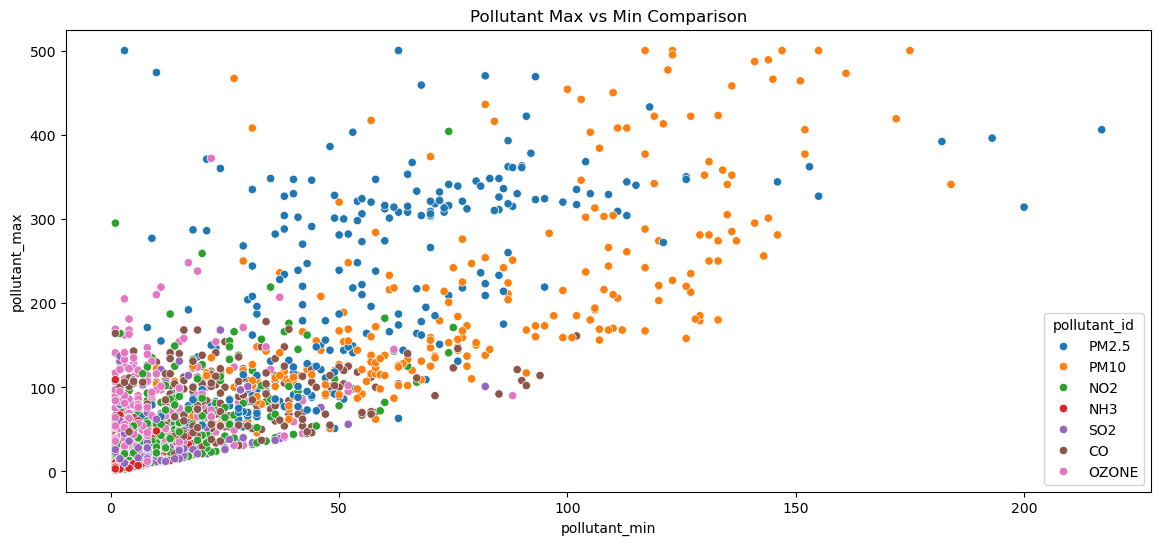

In [15]:
plt.figure(figsize=(14,6))
sns.scatterplot(data=df, x='pollutant_min', y='pollutant_max', hue='pollutant_id')
plt.title('Pollutant Max vs Min Comparison')
plt.show()

## Most Frequently Recorded Pollutants

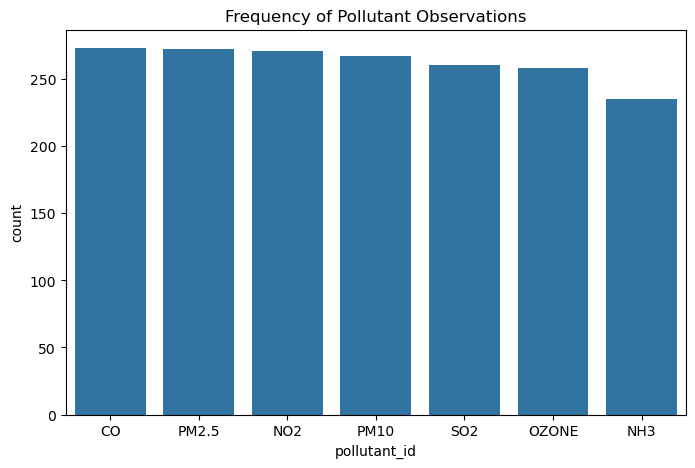

In [16]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='pollutant_id', order=df['pollutant_id'].value_counts().index)
plt.title('Frequency of Pollutant Observations')
plt.show()

## Pie Chart of Pollutant Contribution

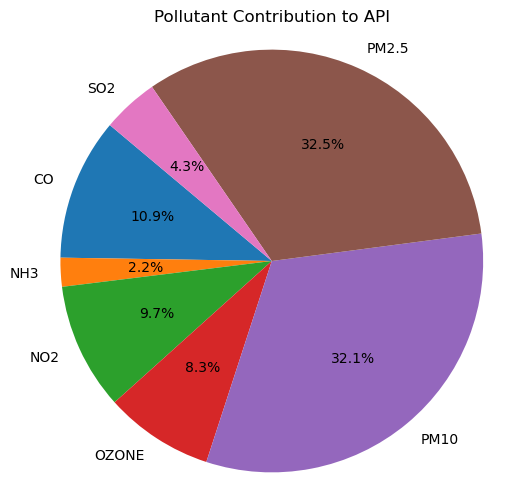

In [17]:
pollutant_data = df.groupby('pollutant_id')['pollutant_avg'].sum()

plt.figure(figsize=(6, 6))
plt.pie(pollutant_data, labels=pollutant_data.index, autopct='%1.1f%%', startangle=140)
plt.title('Pollutant Contribution to API')
plt.axis('equal')
plt.show()

## Correlation Between Pollutants

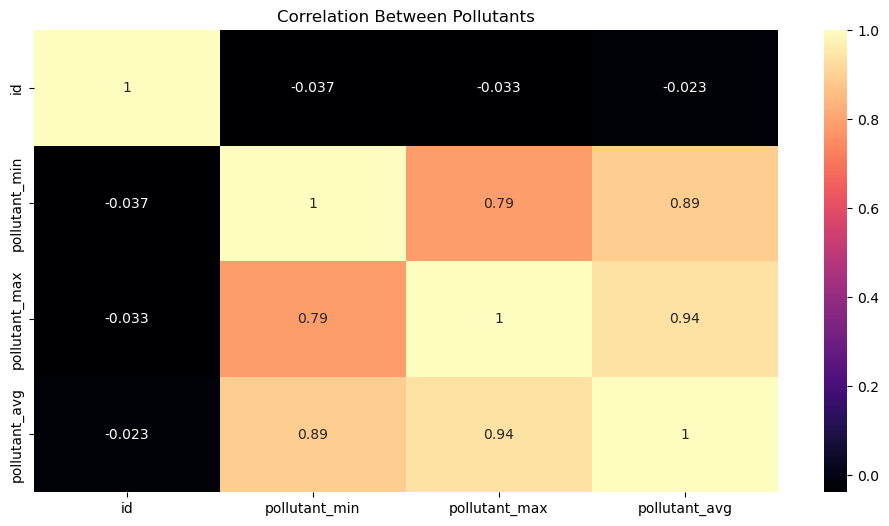

In [18]:
df_numeric = df.select_dtypes(include=['number'])
plt.figure(figsize=(12,6))
sns.heatmap(df_numeric.corr(), annot=True, cmap='magma')
plt.title("Correlation Between Pollutants")
plt.show()

## Pair Plot Of Pollutants and AQI

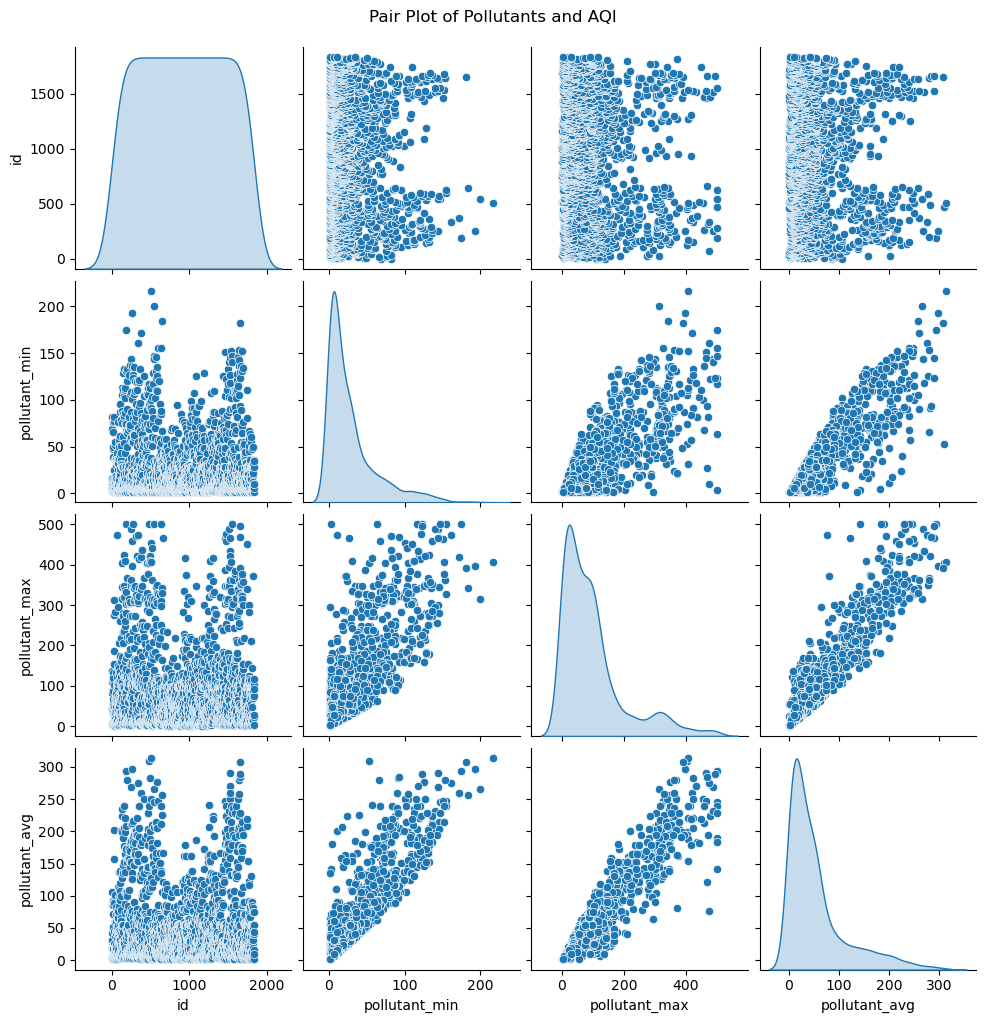

In [19]:
sns.pairplot(df, diag_kind='kde')
plt.suptitle('Pair Plot of Pollutants and AQI',  y=1.02)
plt.show()

## Creating Report Using Y-Data Profiling

In [20]:
profile = ProfileReport(df, title='Air Quality Index Report', explorative=True)

In [21]:
## To show report in Jupiter 
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 10/10 [00:00<00:00, 220.41it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

<Figure size 1200x600 with 0 Axes>

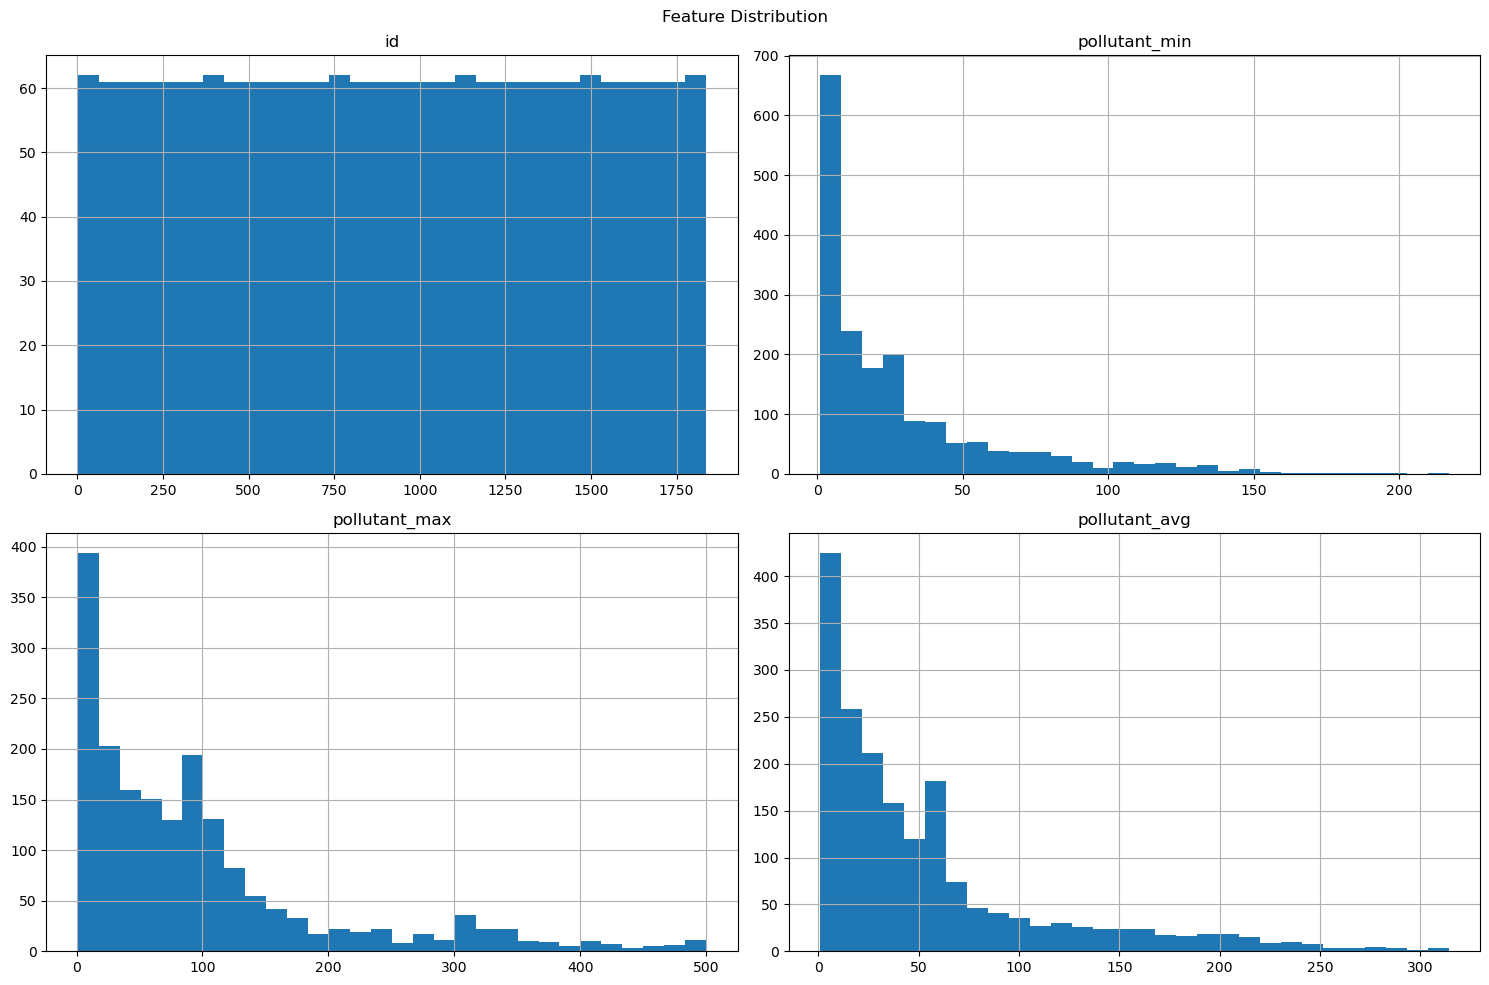

In [22]:
plt.figure(figsize=(12, 6))
df.hist(bins=30, figsize=(15, 10))
plt.suptitle("Feature Distribution")
plt.tight_layout()
plt.show()

## To remove outliers

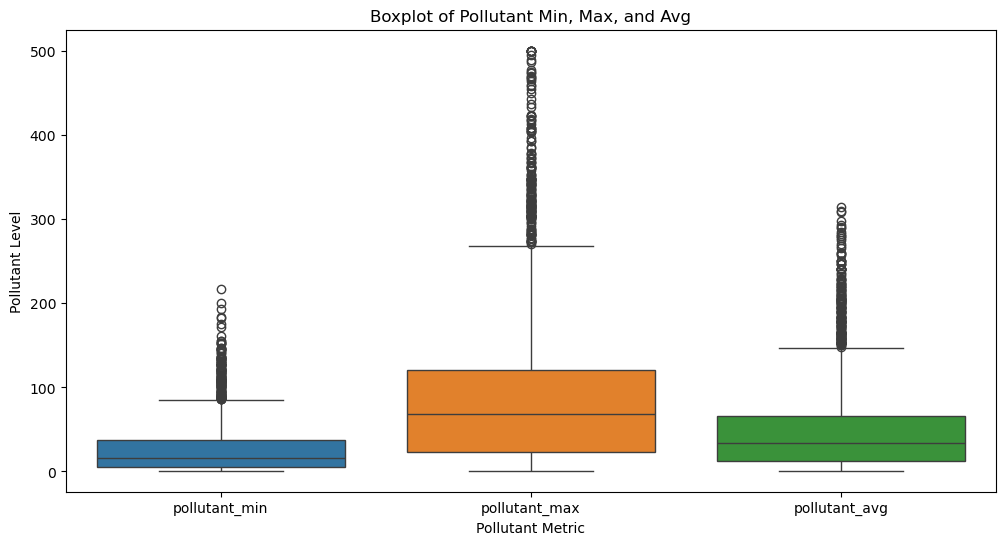

In [23]:
plt.figure(figsize=(12, 6))
columns = ['pollutant_min', 'pollutant_max', 'pollutant_avg']
sns.boxplot(data=df[columns])
plt.title("Boxplot of Pollutant Min, Max, and Avg")
plt.ylabel("Pollutant Level")
plt.xlabel("Pollutant Metric")
plt.show()

In [24]:
columns = ['pollutant_min', 'pollutant_max', 'pollutant_avg']
for col in columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)

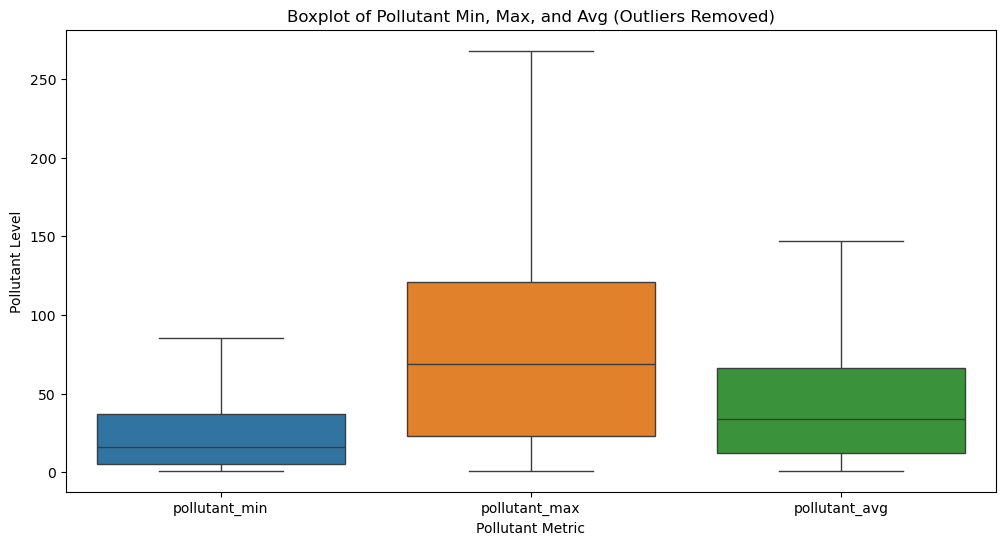

In [25]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[columns])
plt.title("Boxplot of Pollutant Min, Max, and Avg (Outliers Removed)")
plt.ylabel("Pollutant Level")
plt.xlabel("Pollutant Metric")
plt.show()

## Label Encoding on Categorical Data

In [26]:
df["pollutant_id"].unique()

array(['PM2.5', 'PM10', 'NO2', 'NH3', 'SO2', 'CO', 'OZONE'], dtype=object)

In [27]:
encoder = OneHotEncoder(sparse_output=False)

In [28]:
one_hot_encoder = encoder.fit_transform(df[["pollutant_id"]])

In [29]:
one_hot_df = pd.DataFrame(one_hot_encoder, columns=encoder.get_feature_names_out(["pollutant_id"]))

In [30]:
one_hot_df.head(3)

pollutant_id_CO  pollutant_id_NH3  pollutant_id_NO2  pollutant_id_OZONE  \
0              0.0               0.0               0.0                 0.0   
1              0.0               0.0               0.0                 0.0   
2              0.0               0.0               1.0                 0.0   

   pollutant_id_PM10  pollutant_id_PM2.5  pollutant_id_SO2  
0                0.0                 1.0               0.0  
1                1.0                 0.0               0.0  
2                0.0                 0.0               0.0

In [31]:
df_encoded = pd.concat([df.drop(["pollutant_id", "last_update", "country"], axis=1), one_hot_df], axis=1)

# Create a binary target: 1 if pollutant_avg > threshold
df_encoded['target'] = (df_encoded['pollutant_avg'] > 100).astype(int) 

In [32]:
df_encoded.head(3)

id           state       city                         station  \
0   1  Andhra_Pradesh  Amaravati  Secretariat, Amaravati - APPCB   
1   2  Andhra_Pradesh  Amaravati  Secretariat, Amaravati - APPCB   
2   3  Andhra_Pradesh  Amaravati  Secretariat, Amaravati - APPCB   

   pollutant_min  pollutant_max  pollutant_avg  pollutant_id_CO  \
0           69.0          109.0           86.0              0.0   
1           82.0          138.0          105.0              0.0   
2           10.0           42.0           19.0              0.0   

   pollutant_id_NH3  pollutant_id_NO2  pollutant_id_OZONE  pollutant_id_PM10  \
0               0.0               0.0                 0.0                0.0   
1               0.0               0.0                 0.0                1.0   
2               0.0               1.0                 0.0                0.0   

   pollutant_id_PM2.5  pollutant_id_SO2  target  
0                 1.0               0.0       0  
1                 0.0               0.0       1  
2                 0.0               0.0       0

## Feature Distribution and Feature Spliting

In [33]:
## Extracting day of week from date
df["last_update"] = pd.to_datetime(df["last_update"])
df["day_of_week"] = df["last_update"].dt.day_name()

C:\Users\RAHUL\AppData\Local\Temp\ipykernel_23416\382901286.py:2: UserWarning: Parsing dates in %d-%m-%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df["last_update"] = pd.to_datetime(df["last_update"])


In [34]:
## Creating interaction features
df["pollutant_range"] = df["pollutant_max"] - df["pollutant_min"]

In [35]:
df["last_update"] = df["last_update"].astype(str)
df[["last_updated_date", "last_updated_time"]] = df["last_update"].str.split(' ', expand=True)

In [36]:
df.head(3)

id country           state       city                         station  \
0   1   India  Andhra_Pradesh  Amaravati  Secretariat, Amaravati - APPCB   
1   2   India  Andhra_Pradesh  Amaravati  Secretariat, Amaravati - APPCB   
2   3   India  Andhra_Pradesh  Amaravati  Secretariat, Amaravati - APPCB   

  pollutant_id          last_update  pollutant_min  pollutant_max  \
0        PM2.5  2021-10-21 01:00:00           69.0          109.0   
1         PM10  2021-10-21 01:00:00           82.0          138.0   
2          NO2  2021-10-21 01:00:00           10.0           42.0   

   pollutant_avg day_of_week  pollutant_range last_updated_date  \
0           86.0    Thursday             40.0        2021-10-21   
1          105.0    Thursday             56.0        2021-10-21   
2           19.0    Thursday             32.0        2021-10-21   

  last_updated_time  
0          01:00:00  
1          01:00:00  
2          01:00:00

## Scalling using MinMaxScaler

In [37]:
numerical_columns = ['pollutant_min', 'pollutant_max', 'pollutant_avg']

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df[numerical_columns])

scaled_df = pd.DataFrame(scaled_data, columns=numerical_columns)
scaled_df

pollutant_min  pollutant_max  pollutant_avg
0          0.809524       0.404494       0.582192
1          0.964286       0.513109       0.712329
2          0.107143       0.153558       0.123288
3          0.035714       0.014981       0.020548
4          0.178571       0.153558       0.178082
...             ...            ...            ...
1831       0.107143       0.078652       0.095890
1832       0.000000       0.007491       0.006849
1833       0.059524       0.101124       0.061644
1834       0.392857       0.340824       0.273973
1835       0.107143       0.430712       0.287671

[1836 rows x 3 columns]

## Linear Regresion with scalling and without scalling

### Linear Regression witout scalling

In [38]:
x = df[['pollutant_min', 'pollutant_max']]  # feature columns
y = df['pollutant_avg']  # target column 

In [39]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [40]:
x_train.shape

(1468, 2)

In [41]:
x_test.shape

(368, 2)

In [42]:
lr_model = LinearRegression()

In [43]:
lr_model.fit(x_train, y_train)

LinearRegression()

In [44]:
y_pred = lr_model.predict(x_test)

In [45]:
print("Linear Regression without scalling")
print("R2 Score: ", r2_score(y_test, y_pred))

Linear Regression without scalling
R2 Score:  0.9325910382981368


### Linear Regression with scaling

In [46]:
x = scaled_df[['pollutant_min', 'pollutant_max']]  # feature columns
y = scaled_df['pollutant_avg']  # target column 

In [47]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [48]:
model_scaled = LinearRegression()

In [49]:
model_scaled.fit(x_train, y_train)

LinearRegression()

In [50]:
y_scalled_pred = model_scaled.predict(x_test)

In [51]:
print("Linear Regression with scalling")
print("R2 Score: ", r2_score(y_test, y_scalled_pred))

Linear Regression with scalling
R2 Score:  0.9325910382981368


## Logistic Regression

In [52]:
x_en = df_encoded[['pollutant_id_CO', 'pollutant_id_NH3', 'pollutant_id_NO2',
    'pollutant_id_OZONE', 'pollutant_id_PM10',
    'pollutant_id_PM2.5', 'pollutant_id_SO2']]  # feature columns
y_en = df_encoded['target']  # target column 

In [53]:
x_train, x_test, y_train, y_test = train_test_split(x_en, y_en, test_size=0.2, random_state=42)

In [54]:
model = LogisticRegression()

In [55]:
model.fit(x_train, y_train)

LogisticRegression()

In [56]:
y_pred = model.predict(x_test)

In [57]:
acc = accuracy_score(y_test, y_pred)
acc

0.8478260869565217

In [58]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.92      0.91       311
           1       0.51      0.47      0.49        57

    accuracy                           0.85       368
   macro avg       0.71      0.70      0.70       368
weighted avg       0.84      0.85      0.85       368



## Decision Tree

In [59]:
model_tree = DecisionTreeClassifier(random_state=42)

In [60]:
model_tree.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

In [61]:
y_tree_pred = model_tree.predict(x_test)

In [62]:
tree_acc = accuracy_score(y_test, y_tree_pred)
tree_acc

0.8369565217391305

In [63]:
tree_report = classification_report(y_test, y_tree_pred)
print(tree_report)

              precision    recall  f1-score   support

           0       0.98      0.82      0.90       311
           1       0.49      0.91      0.63        57

    accuracy                           0.84       368
   macro avg       0.73      0.87      0.76       368
weighted avg       0.90      0.84      0.85       368



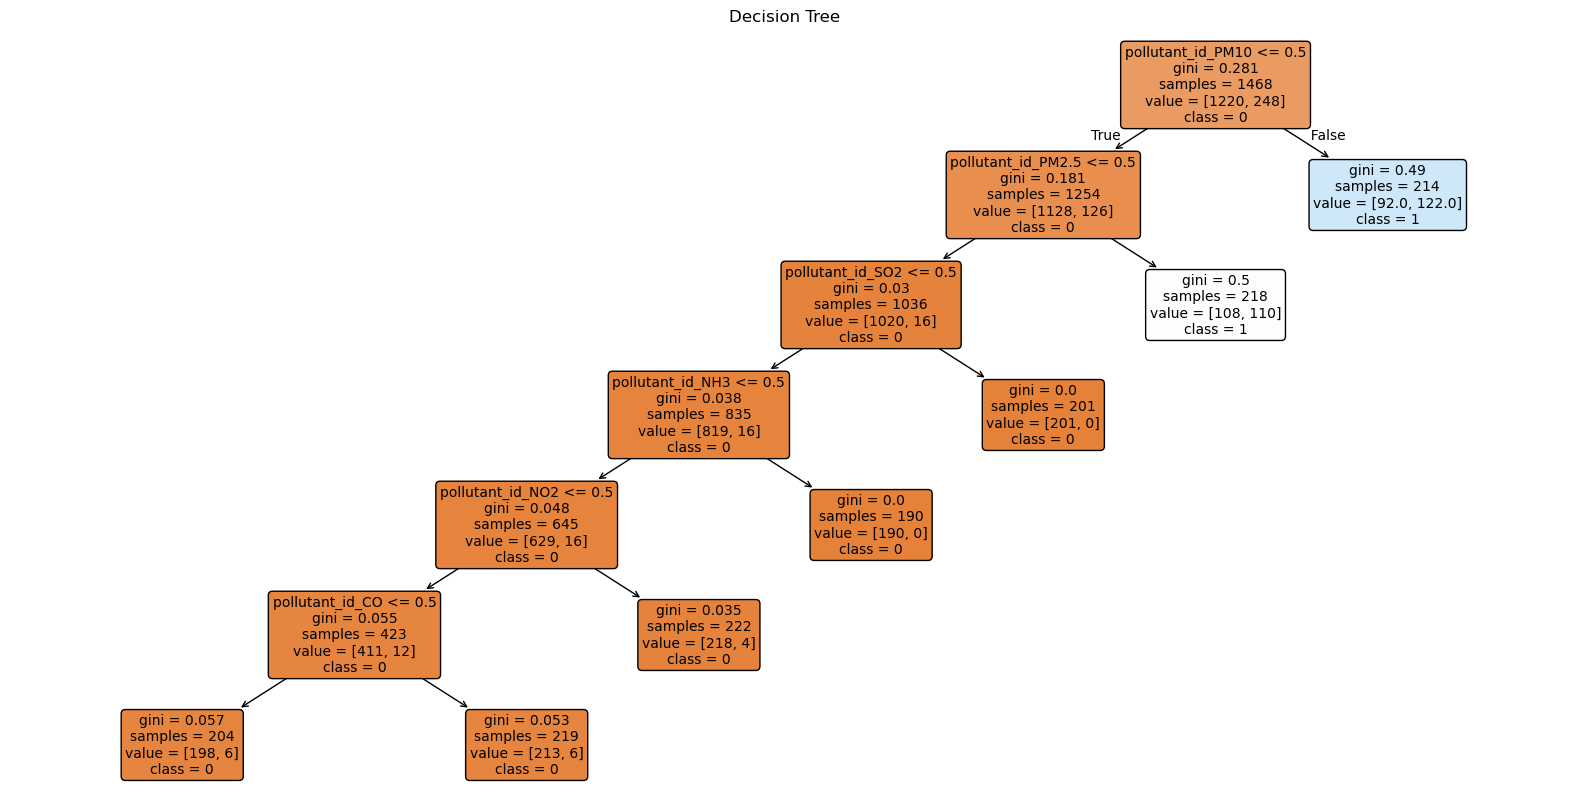

In [64]:
class_names = [str(cls) for cls in sorted(df_encoded['target'].unique())]
plt.figure(figsize=(20, 10))
plot_tree(model_tree,
         feature_names=x_en.columns,
         class_names=class_names,
         filled=True,
         rounded=True,
         fontsize=10)
plt.title("Decision Tree")
plt.show()

## Random Forest

In [65]:
model_forest = RandomForestClassifier(n_estimators=100, random_state=42)

In [66]:
model_forest.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [67]:
y_pred = model_forest.predict(x_test)

In [68]:
accuracy_score(y_test, y_pred)

0.8369565217391305

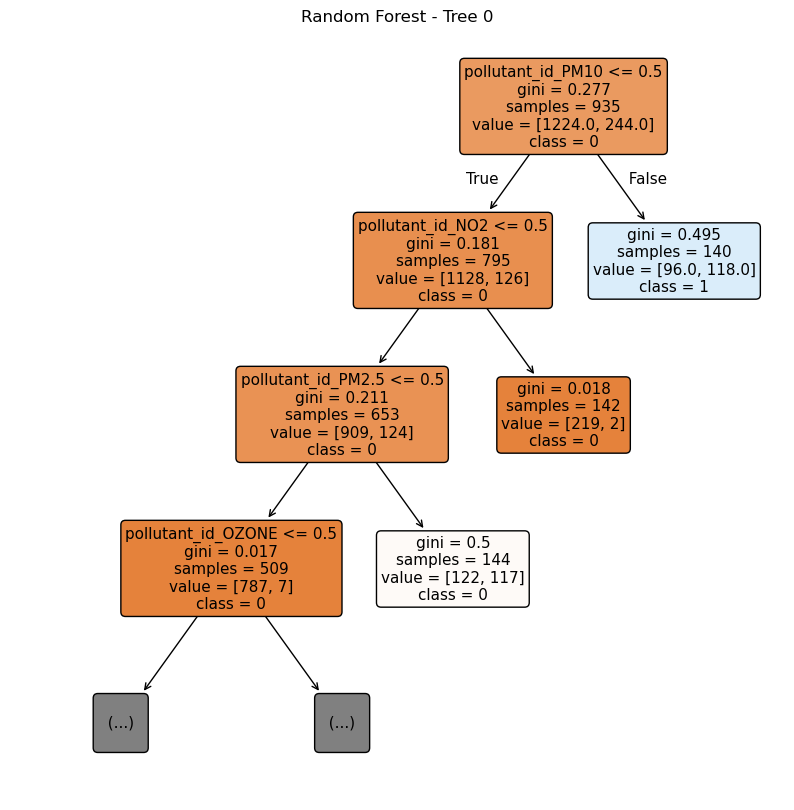

In [69]:
class_names = [str(cls) for cls in sorted(df_encoded['target'].unique())]
estimator = model_forest.estimators_[0]
plt.figure(figsize=(10, 10))
plot_tree(estimator,
          feature_names=x_en.columns,
          class_names=class_names,
          filled=True,
          rounded=True,
         max_depth=3)
plt.title("Random Forest - Tree 0")
plt.show()

## Conclusion

#### The analysis of the AQI dataset reveals significant insights into air quality patterns across different cities and pollutants. Key findings include:

#### Variability in Air Quality: Air quality levels vary significantly across cities and time periods, with some cities consistently recording higher pollution levels, especially during specific seasons (e.g., winter months).

#### Dominant Pollutants: Particulate matter, particularly PM2.5 and PM10, emerged as the most prevalent and dangerous pollutants, often exceeding safe limits.

#### Temporal Trends: There is a noticeable trend of increased pollution during festivals and colder months, likely due to firecrackers, vehicular emissions, and lower atmospheric dispersion.

#### Correlation Among Pollutants: Certain pollutants such as PM2.5 and PM10 show a high correlation, indicating common sources or similar behavior in atmospheric conditions.

#### Data Gaps: Missing values and inconsistent data collection in some regions highlight the need for better and more uniform monitoring systems.